<a href="https://colab.research.google.com/github/Laxmi-Narayana-Chilakala/Stock-price-Prediction/blob/main/stockprice_prediction_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading data into notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [ ]:
#Importing Required libraries for model building

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
#Reading data into a dataframe

In [ ]:
df=pd.read_csv('/content/MSFT.csv')

In [ ]:
#Checking first 5 rows from dataframe 

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [ ]:
#Checking last five rows of dataframe

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


In [ ]:
#Spliting of data into train and test

In [ ]:
data_training=df[df['Date']<'2020-01-01']

In [ ]:
#Train dataset

In [ ]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8516,2019-12-24,157.479996,157.710007,157.119995,157.380005,155.372406,8989200
8517,2019-12-26,157.559998,158.729996,157.399994,158.669998,156.645950,14520600
8518,2019-12-27,159.449997,159.550003,158.220001,158.960007,156.932251,18412800
8519,2019-12-30,158.990005,159.020004,156.729996,157.589996,155.579727,16348400


In [ ]:
data_testing=df[df['Date']>='2020-01-01']

In [ ]:
#Test dataset

In [ ]:
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,158.571075,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,156.596588,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,157.001373,20813700
8524,2020-01-07,159.320007,159.669998,157.320007,157.580002,155.569855,21634100
8525,2020-01-08,158.929993,160.800003,157.949997,160.089996,158.047836,27746500
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [ ]:
#Droping unused features from dataframe

In [ ]:
train_data=data_training.drop(['Date','Adj Close'],axis=1)
train_data

,Open,High,Low,Close,Volume
0,0.088542,0.101563,0.088542,0.097222,1031788800
1,0.097222,0.102431,0.097222,0.100694,308160000
2,0.100694,0.103299,0.100694,0.102431,133171200
3,0.102431,0.103299,0.098958,0.099826,67766400
4,0.099826,0.100694,0.097222,0.098090,47894400
...,...,...,...,...,...
8516,157.479996,157.710007,157.119995,157.380005,8989200
8517,157.559998,158.729996,157.399994,158.669998,14520600
8518,159.449997,159.550003,158.220001,158.960007,18412800
8519,158.990005,159.020004,156.729996,157.589996,16348400


In [ ]:
#Data standardization is the process of bringing data into a uniform format

In [ ]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
train_data

array([[0.00000000e+00, 5.98841076e-05, 0.00000000e+00, 4.37087718e-05,
        1.00000000e+00],
       [5.44673799e-05, 6.53275482e-05, 5.48910441e-05, 6.55631577e-05,
        2.97096179e-01],
       [7.62543318e-05, 7.07709888e-05, 7.68474617e-05, 7.64966349e-05,
        1.27119118e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.56474384e-02],
       [9.97113534e-01, 9.96676248e-01, 9.90577425e-01, 9.91376517e-01,
        1.36421635e-02],
       [9.83182930e-01, 9.88837193e-01, 9.88806754e-01, 9.92068912e-01,
        1.56052814e-02]])

In [ ]:
X_train= []
y_train= []

In [ ]:
#Preparation of data for timesires model building based on previous 60 timestamps

In [ ]:
for i in range(60,train_data.shape[0]):
  X_train.append(train_data[i-60:i])
  y_train.append(train_data[i,3])

In [ ]:
X_train, y_train  = np.array(X_train), np.array(y_train)

In [ ]:
#train shape

In [ ]:
X_train.shape, y_train.shape

((8461, 60, 5), (8461,))

In [ ]:
#Model Builing using LSTM Networks

In [ ]:
regression= Sequential()

regression.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],5)))
regression.add(Dropout(0.2))

regression.add(LSTM(units=60, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=80, activation='relu', return_sequences=True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=100, activation='relu', return_sequences=True))
regression.add(Dropout(0.3))

regression.add(LSTM(units=120, activation='relu'))
regression.add(Dropout(0.2))

regression.add(Dense(units=1))

In [ ]:
#Checking model summary, how many neurons in network

In [ ]:
regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           7

In [ ]:
#Compiling the model with optimizer and loss function

In [ ]:
regression.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Model fitting

In [ ]:
regression.fit(X_train,y_train, epochs=20, batch_size=32)

Epoch 1/20
265/265 [==============================] - 141s 501ms/step - loss: 0.0119
Epoch 2/20
265/265 [==============================] - 132s 497ms/step - loss: 8.8039e-04
Epoch 3/20
265/265 [==============================] - 132s 498ms/step - loss: 7.3362e-04
Epoch 4/20
265/265 [==============================] - 132s 498ms/step - loss: 6.6741e-04
Epoch 5/20
265/265 [==============================] - 131s 496ms/step - loss: 6.6479e-04
Epoch 6/20
265/265 [==============================] - 131s 496ms/step - loss: 5.6198e-04
Epoch 7/20
265/265 [==============================] - 132s 497ms/step - loss: 6.4281e-04
Epoch 8/20
265/265 [==============================] - 130s 491ms/step - loss: 5.5206e-04
Epoch 9/20
265/265 [==============================] - 131s 495ms/step - loss: 5.0632e-04
Epoch 10/20
265/265 [==============================] - 131s 493ms/step - loss: 5.0868e-04
Epoch 11/20
265/265 [==============================] - 131s 495ms/step - loss: 4.8194e-04
Epoch 12/20
265/265 [==

In [ ]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,158.571075,22622100
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,156.596588,21116200
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,157.001373,20813700
8524,2020-01-07,159.320007,159.669998,157.320007,157.580002,155.569855,21634100
8525,2020-01-08,158.929993,160.800003,157.949997,160.089996,158.047836,27746500


In [ ]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
8461,2019-10-07,137.139999,138.179993,137.020004,137.119995,134.911774,15303700
8462,2019-10-08,137.080002,137.759995,135.619995,135.669998,133.485138,25550500
8463,2019-10-09,137.460007,138.699997,136.970001,138.240005,136.013748,19749900
8464,2019-10-10,138.490005,139.669998,138.250000,139.100006,136.859909,17654600
8465,2019-10-11,140.119995,141.029999,139.500000,139.679993,137.430542,25446000
8466,2019-10-14,139.690002,140.289993,139.520004,139.550003,137.302643,13304300
8467,2019-10-15,140.059998,141.789993,139.809998,141.570007,139.290131,19695700
8468,2019-10-16,140.789993,140.990005,139.529999,140.410004,138.148804,20751600
8469,2019-10-17,140.949997,141.419998,139.020004,139.690002,137.440399,21460600
8470,2019-10-18,139.759995,140.000000,136.559998,137.410004,135.197113,32273500


In [ ]:
past_60_days=data_training.tail(60)

In [ ]:
df1=past_60_days.append(data_testing,ignore_index=True)
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,137.139999,138.179993,137.020004,137.119995,134.911774,15303700
1,2019-10-08,137.080002,137.759995,135.619995,135.669998,133.485138,25550500
2,2019-10-09,137.460007,138.699997,136.970001,138.240005,136.013748,19749900
3,2019-10-10,138.490005,139.669998,138.250000,139.100006,136.859909,17654600
4,2019-10-11,140.119995,141.029999,139.500000,139.679993,137.430542,25446000
...,...,...,...,...,...,...,...
391,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
392,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
393,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
394,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [ ]:
df1=df1.drop(['Date','Adj Close'], axis=1)
df1.head()

,Open,High,Low,Close,Volume
0,137.139999,138.179993,137.020004,137.119995,15303700
1,137.080002,137.759995,135.619995,135.669998,25550500
2,137.460007,138.699997,136.970001,138.240005,19749900
3,138.490005,139.669998,138.250000,139.100006,17654600
4,140.119995,141.029999,139.500000,139.679993,25446000


In [ ]:
inputs=scaler.transform(df1)
inputs

array([[0.8600038 , 0.86598344, 0.86593435, 0.8625288 , 0.01262738],
       [0.85962732, 0.86334953, 0.8570809 , 0.85340185, 0.02258071],
       [0.86201186, 0.86924452, 0.86561814, 0.86957867, 0.01694624],
       ...,
       [1.60246695, 1.60548865, 1.57407931, 1.58884716, 0.0371885 ],
       [1.5665737 , 1.58654947, 1.57787366, 1.58676997, 0.02780536],
       [1.58954028, 1.59451398, 1.58748584, 1.58475579, 0.01679957]])

In [ ]:
#Test data preparation for model prediction 

In [ ]:
X_test=[]
y_test=[]

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,3])


In [ ]:
inputs[60,3]

1.0104487394593986

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((336, 60, 5), (336,))

In [ ]:
#Model prediction using test data

In [ ]:
y_pred=regression.predict(X_test)

In [ ]:
scaler.scale_

array([6.27504311e-03, 6.27124427e-03, 6.32385235e-03, 6.29446533e-03,
       9.71359655e-10])

In [ ]:
y_pred

array([[0.8495941 ],
       [0.8517397 ],
       [0.85391235],
       [0.85608214],
       [0.85822254],
       [0.8603139 ],
       [0.862367  ],
       [0.86439896],
       [0.8664365 ],
       [0.86849684],
       [0.8705924 ],
       [0.87274086],
       [0.874969  ],
       [0.8772963 ],
       [0.8797247 ],
       [0.8822494 ],
       [0.8848443 ],
       [0.8874482 ],
       [0.8900008 ],
       [0.8924819 ],
       [0.8949217 ],
       [0.897363  ],
       [0.89985996],
       [0.9024961 ],
       [0.90536565],
       [0.90855485],
       [0.91212404],
       [0.9161206 ],
       [0.9205513 ],
       [0.9253725 ],
       [0.9305071 ],
       [0.93587095],
       [0.9413926 ],
       [0.9470134 ],
       [0.95265883],
       [0.9582134 ],
       [0.96346205],
       [0.968189  ],
       [0.97223014],
       [0.97540504],
       [0.9775175 ],
       [0.9785337 ],
       [0.97853786],
       [0.9777059 ],
       [0.97622645],
       [0.97422737],
       [0.9717219 ],
       [0.968

In [ ]:
#making into normal scale from standardizing

In [ ]:
scale=1/6.29446533e-03
scale

158.86972881301102

In [ ]:
y_pred=y_pred*scale
y_test=y_test*scale

In [ ]:
inputs[60,0]*scale

158.20179799222524

In [ ]:
#Predicting output

In [ ]:
y_pred

array([[134.9748 ],
       [135.31566],
       [135.66083],
       [136.00554],
       [136.3456 ],
       [136.67784],
       [137.00401],
       [137.32683],
       [137.65053],
       [137.97786],
       [138.31079],
       [138.65211],
       [139.00609],
       [139.37584],
       [139.76163],
       [140.16273],
       [140.57498],
       [140.98866],
       [141.3942 ],
       [141.78836],
       [142.17598],
       [142.56383],
       [142.96051],
       [143.37932],
       [143.8352 ],
       [144.34187],
       [144.9089 ],
       [145.54384],
       [146.24774],
       [147.01369],
       [147.82942],
       [148.68156],
       [149.55879],
       [150.45177],
       [151.34866],
       [152.23111],
       [153.06496],
       [153.81593],
       [154.45795],
       [154.96234],
       [155.29794],
       [155.45938],
       [155.46005],
       [155.32788],
       [155.09283],
       [154.77524],
       [154.3772 ],
       [153.90204],
       [153.35257],
       [152.71425],


In [ ]:
#After Prediction evalauating with actual vs predicted 

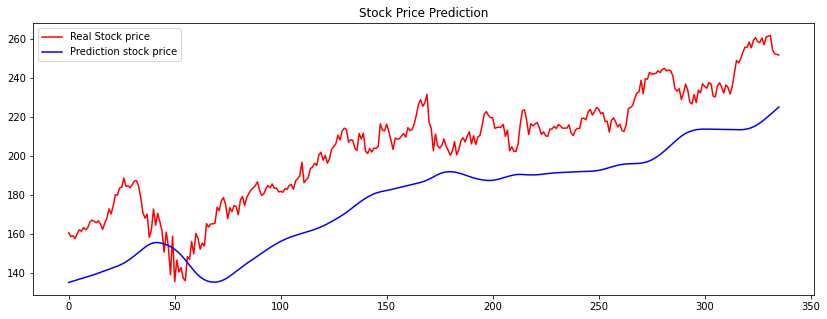

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color='red',label='Real Stock price')
plt.plot(y_pred,color='blue', label='Prediction stock price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()